In [1]:
import sys, os; sys.path.append(os.path.abspath(os.path.join(os.path.dirname(__file__) if '__file__' in globals() else os.getcwd(), '..')))
#import os; os.chdir(os.path.dirname(os.getcwd()))
from utils.model_loader import get_model_fits
import numpy as np
import pandas as pd
import re
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt


/Users/augustarnstad/Documents/source_code/prior_paper/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data_dir = f"datasets/friedman/many"
results_dir_relu = "results/regression/single_layer/relu/friedman"
results_dir_tanh = "results/regression/single_layer/tanh/friedman"

model_names_relu = ["Gaussian", "Regularized Horseshoe", "Dirichlet Horseshoe", "Dirichlet Student T"]#, "Pred CP"]
model_names_tanh = ["Gaussian tanh", "Regularized Horseshoe tanh", "Dirichlet Horseshoe tanh", "Dirichlet Student T tanh"]#, "Pred CP tanh"]


relu_fits = {}
tanh_fits = {}

files = sorted(f for f in os.listdir(data_dir) if f.endswith(".npz"))
for fname in files:
    base_config_name = fname.replace(".npz", "")  # e.g., "GAM_N100_p8_sigma1.00_seed1"
    full_config_path = f"{base_config_name}"  # → "type_1/GAM_N100_p8_sigma1.00_seed1"
    relu_fit = get_model_fits(
        config=full_config_path,
        results_dir=results_dir_relu,
        models=model_names_relu,
        include_prior=False,
    )
    
    tanh_fit = get_model_fits(
        config=full_config_path,
        results_dir=results_dir_tanh,
        models=model_names_tanh,
        include_prior=False,
    )
    

    relu_fits[base_config_name] = relu_fit  # use clean key
    tanh_fits[base_config_name] = tanh_fit  # use clean key
    


16:09:26 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 3 divergent transitions (0.3%)
	Chain 1 had 997 iterations at max treedepth (99.7%)
	Chain 2 had 1 divergent transitions (0.1%)
	Chain 2 had 999 iterations at max treedepth (99.9%)
	Chain 3 had 1000 iterations at max treedepth (100.0%)
	Chain 4 had 4 divergent transitions (0.4%)
	Chain 4 had 996 iterations at max treedepth (99.6%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.
16:09:26 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 1000 iterations at max treedepth (100.0%)
	Chain 2 had 20 divergent transitions (2.0%)
	Chain 2 had 980 iterations at max treedepth (98.0%)
	Chain 3 had 1000 iterations at max treedepth (100.0%)
	Chain 4 had 1000 iterations at max treedepth (100.0%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.
16:09:27 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Ch

In [3]:
data_dir = f"datasets/friedman"
results_dir_relu = "results/regression/single_layer/relu/friedman"
results_dir_tanh = "results/regression/single_layer/tanh/friedman"


files = sorted(f for f in os.listdir(data_dir) if f.endswith(".npz"))
for fname in files:
    base_config_name = fname.replace(".npz", "")  # e.g., "GAM_N100_p8_sigma1.00_seed1"
    full_config_path = f"{base_config_name}"  # → "type_1/GAM_N100_p8_sigma1.00_seed1"
    relu_fit = get_model_fits(
        config=full_config_path,
        results_dir=results_dir_relu,
        models=model_names_relu,
        include_prior=False,
    )
    
    tanh_fit = get_model_fits(
        config=full_config_path,
        results_dir=results_dir_tanh,
        models=model_names_tanh,
        include_prior=False,
    )
    

    relu_fits[base_config_name] = relu_fit  # use clean key
    tanh_fits[base_config_name] = tanh_fit  # use clean key
    


16:10:58 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 4 divergent transitions (0.4%)
	Chain 1 had 996 iterations at max treedepth (99.6%)
	Chain 2 had 1000 iterations at max treedepth (100.0%)
	Chain 3 had 6 divergent transitions (0.6%)
	Chain 3 had 994 iterations at max treedepth (99.4%)
	Chain 4 had 1000 iterations at max treedepth (100.0%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.
16:10:58 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 1000 iterations at max treedepth (100.0%)
	Chain 2 had 27 divergent transitions (2.7%)
	Chain 2 had 973 iterations at max treedepth (97.3%)
	Chain 3 had 2 divergent transitions (0.2%)
	Chain 3 had 998 iterations at max treedepth (99.8%)
	Chain 4 had 1 divergent transitions (0.1%)
	Chain 4 had 999 iterations at max treedepth (99.9%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.
16:10:59 - cmdstanpy - WARNING - So

In [4]:
data_dir = f"datasets/friedman_correlated/many"
results_dir_relu_correlated = "results/regression/single_layer/relu/friedman_correlated"
results_dir_tanh_correlated = "results/regression/single_layer/tanh/friedman_correlated"

relu_fits_correlated = {}
tanh_fits_correlated = {}

files = sorted(f for f in os.listdir(data_dir) if f.endswith(".npz"))
for fname in files:
    base_config_name = fname.replace(".npz", "")  # e.g., "GAM_N100_p8_sigma1.00_seed1"
    full_config_path = f"{base_config_name}"  # → "type_1/GAM_N100_p8_sigma1.00_seed1"
    relu_fit_correlated = get_model_fits(
        config=full_config_path,
        results_dir=results_dir_relu_correlated,
        models=model_names_relu,
        include_prior=False,
    )
    
    tanh_fit_correlated = get_model_fits(
        config=full_config_path,
        results_dir=results_dir_tanh_correlated,
        models=model_names_tanh,
        include_prior=False,
    )
    

    relu_fits_correlated[base_config_name] = relu_fit_correlated  # use clean key
    tanh_fits_correlated[base_config_name] = tanh_fit_correlated  # use clean key


16:11:25 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 1000 iterations at max treedepth (100.0%)
	Chain 2 had 1000 iterations at max treedepth (100.0%)
	Chain 3 had 1000 iterations at max treedepth (100.0%)
	Chain 4 had 1000 iterations at max treedepth (100.0%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.
16:11:26 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 1000 iterations at max treedepth (100.0%)
	Chain 2 had 2 divergent transitions (0.2%)
	Chain 2 had 998 iterations at max treedepth (99.8%)
	Chain 3 had 1000 iterations at max treedepth (100.0%)
	Chain 4 had 1000 iterations at max treedepth (100.0%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.
16:11:27 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 373 divergent transitions (37.3%)
	Chain 1 had 627 iterations at max treedepth (62.7%)
	Chain 2 had 257 divergent tra

In [5]:
data_dir = f"datasets/friedman_correlated"
results_dir_relu = "results/regression/single_layer/relu/friedman_correlated"
results_dir_tanh = "results/regression/single_layer/tanh/friedman_correlated"

files = sorted(f for f in os.listdir(data_dir) if f.endswith(".npz"))
for fname in files:
    base_config_name = fname.replace(".npz", "")  # e.g., "GAM_N100_p8_sigma1.00_seed1"
    full_config_path = f"{base_config_name}"  # → "type_1/GAM_N100_p8_sigma1.00_seed1"
    relu_fit_correlated = get_model_fits(
        config=full_config_path,
        results_dir=results_dir_relu,
        models=model_names_relu,
        include_prior=False,
    )
    
    tanh_fit_correlated = get_model_fits(
        config=full_config_path,
        results_dir=results_dir_tanh,
        models=model_names_tanh,
        include_prior=False,
    )
    

    relu_fits_correlated[base_config_name] = relu_fit_correlated  # use clean key
    tanh_fits_correlated[base_config_name] = tanh_fit_correlated  # use clean key
    


16:13:43 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 1000 iterations at max treedepth (100.0%)
	Chain 2 had 1000 iterations at max treedepth (100.0%)
	Chain 3 had 1000 iterations at max treedepth (100.0%)
	Chain 4 had 1000 iterations at max treedepth (100.0%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.
16:13:44 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 1 divergent transitions (0.1%)
	Chain 1 had 999 iterations at max treedepth (99.9%)
	Chain 2 had 1000 iterations at max treedepth (100.0%)
	Chain 3 had 2 divergent transitions (0.2%)
	Chain 3 had 998 iterations at max treedepth (99.8%)
	Chain 4 had 1000 iterations at max treedepth (100.0%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.
16:13:45 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 228 divergent transitions (22.8%)
	Chain 1 had 772 iterations at max treede

[WARNING] No files matched: results/regression/single_layer/relu/friedman_correlated/gaussian/U2/chain_*.csv
[WARNING] No files matched: results/regression/single_layer/relu/friedman_correlated/regularized_horseshoe/U2/chain_*.csv
[WARNING] No files matched: results/regression/single_layer/relu/friedman_correlated/dirichlet_horseshoe/U2/chain_*.csv
[WARNING] No files matched: results/regression/single_layer/relu/friedman_correlated/dirichlet_student_t/U2/chain_*.csv
[WARNING] No files matched: results/regression/single_layer/tanh/friedman_correlated/gaussian_tanh/U2/chain_*.csv
[WARNING] No files matched: results/regression/single_layer/tanh/friedman_correlated/regularized_horseshoe_tanh/U2/chain_*.csv
[WARNING] No files matched: results/regression/single_layer/tanh/friedman_correlated/dirichlet_horseshoe_tanh/U2/chain_*.csv
[WARNING] No files matched: results/regression/single_layer/tanh/friedman_correlated/dirichlet_student_t_tanh/U2/chain_*.csv


In [6]:
import re
import numpy as np
import pandas as pd
from properscoring import crps_ensemble
from scores.probability import crps_for_ensemble

_FRIEDMAN_KEY = re.compile(r"Friedman_N(\d+)_p\d+_sigma([\d.]+)_seed(\d+)")

def extract_friedman_metadata(key: str):
    """
    Parse 'Friedman_N{N}_p10_sigma{sigma}_seed{seed}' -> (N:int, sigma:float, seed:int)
    Returns (None, None, None) if it doesn't match.
    """
    m = _FRIEDMAN_KEY.search(key)
    if not m:
        return None, None, None
    N = int(m.group(1))
    sigma = float(m.group(2))
    seed = int(m.group(3))
    return N, sigma, seed


In [7]:
def compute_rmse_from_fits(all_fits, model_names=None, folder="friedman"):
    """
    Iterate over all dataset keys in `all_fits` (e.g., relu_fits or tanh_fits).
    For each model in `model_names` (or all models found if None), compute:
      - RMSE for each posterior draw
      - RMSE of the posterior mean predictor

    Returns:
        df_rmse: long DF with one row per posterior draw.
        df_posterior_rmse: one row per model/dataset with posterior-mean RMSE.
    """
    rmse_rows = []
    post_mean_rows = []

    for dataset_key, model_dict in all_fits.items():
        N, sigma, seed = extract_friedman_metadata(dataset_key)
        if N is None:
            # Skip non-Friedman entries if any
            continue

        
        try:
            path = f"datasets/{folder}/Friedman_N{N}_p10_sigma{sigma:.2f}_seed{seed}.npz"
            data = np.load(path)
            y_test = data["y_test"].squeeze()  # shape (N_test,)
        except FileNotFoundError:
            path = f"datasets/{folder}/many/Friedman_N{N}_p10_sigma{sigma:.2f}_seed{seed}.npz"
            data = np.load(path)
            y_test = data["y_test"].squeeze()  # shape (N_test,)
            #print(f"[SKIP] y_test not found: {path}")
            #continue

        # Choose which models to evaluate
        models_to_eval = model_names or list(model_dict.keys())

        for model in models_to_eval:
            # Some entries may be missing
            entry = model_dict.get(model, None)
            if not entry or "posterior" not in entry:
                print(f"[SKIP] Missing posterior: {dataset_key} -> {model}")
                continue

            fit = entry["posterior"]

            # Expecting (S, N_test, 1) or (S, N_test)
            output_test = fit.stan_variable("output_test")
            if output_test.ndim == 3 and output_test.shape[-1] == 1:
                preds = output_test[..., 0]  # (S, N_test)
            elif output_test.ndim == 2:
                preds = output_test  # (S, N_test)
            else:
                raise ValueError(f"Unexpected output_test shape {output_test.shape} for {dataset_key} -> {model}")

            # Per-sample RMSE
            sq_err = (preds - y_test[None, :])**2  # (S, N_test)
            rmse_per_sample = np.sqrt(np.mean(sq_err, axis=1))  # (S,)

            for s_idx, rmse in enumerate(rmse_per_sample):
                rmse_rows.append({
                    "dataset_key": dataset_key,
                    "model": model,
                    "N": N,
                    "sigma": sigma,
                    "seed": seed,
                    "sample_idx": s_idx,
                    "rmse": float(rmse)
                })

            # Posterior-mean RMSE
            posterior_mean = preds.mean(axis=0)  # (N_test,)
            post_mean_rmse = float(np.sqrt(np.mean((posterior_mean - y_test)**2)))
            post_mean_rows.append({
                "dataset_key": dataset_key,
                "model": model,
                "N": N,
                "sigma": sigma,
                "seed": seed,
                "posterior_mean_rmse": post_mean_rmse
            })

    df_rmse = pd.DataFrame(rmse_rows)
    df_posterior_rmse = pd.DataFrame(post_mean_rows)
    return df_rmse, df_posterior_rmse


def compute_crps_from_fits(all_fits, model_names=None, folder="friedman"):
    """
    Compute CRPS per dataset/model using all posterior predictive samples.

    Returns:
        df_crps: one row per dataset/model with mean CRPS.
    """
    rows = []

    for dataset_key, model_dict in all_fits.items():
        N, sigma, seed = extract_friedman_metadata(dataset_key)
        if N is None:
            continue

        try:
            path = f"datasets/{folder}/Friedman_N{N}_p10_sigma{sigma:.2f}_seed{seed}.npz"
            data = np.load(path)
            y_test = data["y_test"].squeeze()  # shape (N_test,)
        except FileNotFoundError:
            path = f"datasets/{folder}/many/Friedman_N{N}_p10_sigma{sigma:.2f}_seed{seed}.npz"
            data = np.load(path)
            y_test = data["y_test"].squeeze()  # shape (N_test,)
            #print(f"[SKIP] y_test not found: {path}")
            #continue

        models_to_eval = model_names or list(model_dict.keys())

        for model in models_to_eval:
            entry = model_dict.get(model, None)
            if not entry or "posterior" not in entry:
                print(f"[SKIP] Missing posterior: {dataset_key} -> {model}")
                continue

            fit = entry["posterior"]
            output_test = fit.stan_variable("output_test")

            # Expecting (S, N_test, 1) or (S, N_test)
            if output_test.ndim == 3 and output_test.shape[-1] == 1:
                preds = output_test[..., 0]  # (S, N_test)
            elif output_test.ndim == 2:
                preds = output_test  # (S, N_test)
            else:
                raise ValueError(f"Unexpected output_test shape {output_test.shape} for {dataset_key} -> {model}")

            # crps_ensemble expects shape (N_test, S)
            crps_point = crps_ensemble(y_test, preds.T)  # (N_test,)
            rows.append({
                "dataset_key": dataset_key,
                "model": model,
                "N": N,
                "sigma": sigma,
                "seed": seed,
                "crps": float(crps_point.mean())
            })

    df_crps = pd.DataFrame(rows)
    return df_crps

import numpy as np
import pandas as pd
import xarray as xr

def compute_crps_from_fits_distributional(
    all_fits,
    model_names=None,
    folder="friedman",
    return_pointwise=True,
    add_obs_summaries=True,
):
    """
    Computes CRPS per test point using posterior predictive ensemble.
    Optionally returns pointwise CRPS (distribution across test points),
    plus per-dataset/model summaries (mean/median/quantiles over test points).

    Returns:
        df_pointwise (optional): one row per (dataset_key, model, test_idx) with crps_i
        df_summary: one row per (dataset_key, model) with summary stats over test points
    """
    rows_pointwise = []
    rows_summary = []

    for dataset_key, model_dict in all_fits.items():
        N, sigma, seed = extract_friedman_metadata(dataset_key)
        if N is None:
            continue

        # load y_test
        path1 = f"datasets/{folder}/Friedman_N{N}_p10_sigma{sigma:.2f}_seed{seed}.npz"
        path2 = f"datasets/{folder}/many/Friedman_N{N}_p10_sigma{sigma:.2f}_seed{seed}.npz"
        try:
            data = np.load(path1)
        except FileNotFoundError:
            data = np.load(path2)
        y_test = data["y_test"].squeeze()  # (N_test,)

        models_to_eval = model_names or list(model_dict.keys())

        for model in models_to_eval:
            entry = model_dict.get(model, None)
            if not entry or "posterior" not in entry:
                print(f"[SKIP] Missing posterior: {dataset_key} -> {model}")
                continue

            fit = entry["posterior"]
            output_test = fit.stan_variable("output_test")

            # (S, N_test, 1) or (S, N_test)
            if output_test.ndim == 3 and output_test.shape[-1] == 1:
                preds = output_test[..., 0]  # (S, N_test)
            elif output_test.ndim == 2:
                preds = output_test  # (S, N_test)
            else:
                raise ValueError(f"Unexpected output_test shape {output_test.shape} for {dataset_key} -> {model}")

            # per test point CRPS, using full posterior predictive ensemble
            #crps_i = crps_ensemble(y_test, preds.T)  # shape (N_test,)
            fcst = xr.DataArray(
                preds, 
                dims=["ensemble_member", "test_index"]
            )
            obs = xr.DataArray(
                y_test, 
                dims=["test_index"]
            )

            # compute CRPS for each test point
            crps_da = crps_for_ensemble(
                fcst,
                obs,
                ensemble_member_dim="ensemble_member",
                preserve_dims="test_index",
                method="fair"
            )

            crps_i = crps_da.values

            # store pointwise distribution across test points
            if return_pointwise:
                for i, val in enumerate(crps_i):
                    rows_pointwise.append({
                        "dataset_key": dataset_key,
                        "model": model,
                        "N": N,
                        "sigma": sigma,
                        "seed": seed,
                        "test_idx": i,
                        "y_true": float(y_test[i]),
                        "crps": float(val),
                    })

            # store summaries over test points (distributional summaries!)
            if add_obs_summaries:
                rows_summary.append({
                    "dataset_key": dataset_key,
                    "model": model,
                    "N": N,
                    "sigma": sigma,
                    "seed": seed,
                    "crps_mean": float(np.mean(crps_i)),
                    "crps_median": float(np.median(crps_i)),
                    "crps_q10": float(np.quantile(crps_i, 0.10)),
                    "crps_q90": float(np.quantile(crps_i, 0.90)),
                    "crps_std_over_test": float(np.std(crps_i, ddof=1)) if len(crps_i) > 1 else 0.0,
                })

    df_pointwise = pd.DataFrame(rows_pointwise) if return_pointwise else None
    df_summary = pd.DataFrame(rows_summary)

    return df_pointwise, df_summary


In [8]:
# Evaluate ReLU models
df_rmse_relu, df_posterior_rmse_relu = compute_rmse_from_fits(
    relu_fits, model_names_relu  # or None to use all found
)
# df_crps_relu = compute_crps_from_fits_distributional(
#     relu_fits, model_names_relu
# )

df_rmse_relu_correlated, df_posterior_rmse_relu_correlated = compute_rmse_from_fits(
    relu_fits_correlated, model_names_relu, folder = "friedman_correlated"
)
# df_crps_relu_correlated = compute_crps_from_fits_distributional(
#     relu_fits_correlated, model_names_relu, folder = "friedman_correlated"
# )

# Evaluate tanh models
df_rmse_tanh, df_posterior_rmse_tanh = compute_rmse_from_fits(
    tanh_fits, model_names_tanh
)
# df_crps_tanh = compute_crps_from_fits_distributional(
#     tanh_fits, model_names_tanh
# )

df_rmse_tanh_correlated, df_posterior_rmse_tanh_correlated = compute_rmse_from_fits(
    tanh_fits_correlated, model_names_tanh, folder = "friedman_correlated"
)
# df_crps_tanh_correlated = compute_crps_from_fits_distributional(
#     tanh_fits_correlated, model_names_tanh, folder = "friedman_correlated"
# )


In [46]:
# df_crps_pointwise_relu, df_crps_summary_relu = compute_crps_from_fits_distributional(
#     relu_fits, model_names_relu, folder="friedman"
# )

# df_crps_pointwise_tanh, df_crps_summary_tanh = compute_crps_from_fits_distributional(
#     tanh_fits, model_names_tanh, folder="friedman"
# )

# df_crps_pointwise_relu_corr, df_crps_summary_relu_corr = compute_crps_from_fits_distributional(
#     relu_fits_correlated, model_names_relu, folder="friedman_correlated"
# )

# df_crps_pointwise_tanh_corr, df_crps_summary_tanh_corr = compute_crps_from_fits_distributional(
#     tanh_fits_correlated, model_names_tanh, folder="friedman_correlated"
# )

# df_crps_pointwise_relu["setting"] = "Original"
# df_crps_pointwise_tanh["setting"] = "Original"
# df_crps_pointwise_relu_corr["setting"] = "Correlated"
# df_crps_pointwise_tanh_corr["setting"] = "Correlated"
# df_crps_relu[0]["setting"] = "Original"
# df_crps_tanh[0]["setting"] = "Original"
# df_crps_relu_correlated[0]["setting"] = "Correlated"
# df_crps_tanh_correlated[0]["setting"] = "Correlated"


In [ ]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # --- combine into one long df ---
# df_crps_relu[0]["activation"] = "ReLU"
# df_crps_tanh[0]["activation"] = "tanh"
# df_crps_relu_correlated[0]["activation"] = "ReLU"
# df_crps_tanh_correlated[0]["activation"] = "tanh"

# df_crps_all = pd.concat(
#     [df_crps_relu[0], df_crps_tanh[0],
#      df_crps_relu_correlated[0], df_crps_tanh_correlated[0]],
#     ignore_index=True
# )

# optional: make model names consistent if they include " tanh"/" ReLU" suffixes
# df_crps_all["model_clean"] = (
#     df_crps_all["model"]
#       .str.replace(" tanh", "", regex=False)
#       .str.replace(" ReLU", "", regex=False)
# )

# # nice ordering (edit as you like)
# model_order = ["Gauss", "RHS", "DHS", "DST"]
# model_order = [m for m in model_order if m in df_crps_all["model"].unique()]

# #df_crps_all["model_clean"] = pd.Categorical(df_crps_all["model_clean"],
# #                                            categories=model_order, ordered=True)
# df_crps_all["setting"] = pd.Categorical(df_crps_all["setting"],
#                                         categories=["Original", "Correlated"], ordered=True)
# df_crps_all["activation"] = pd.Categorical(df_crps_all["activation"],
#                                           categories=["ReLU", "tanh"], ordered=True)

# # --- JOINT/FACET plot: distributions of pointwise CRPS ---
# g = sns.catplot(
#     data=df_crps_all,
#     x="model", y="crps",
#     row="setting", col="N",
#     hue="activation",
#     kind="violin",
#     inner="quartile",
#     cut=0,
#     height=3.0, aspect=1.15,
#     sharey=True
# )

# g.set_axis_labels("", "Pointwise CRPS")
# g.set_titles(row_template="{row_name}", col_template="N = {col_name}")

# # rotate x labels + bump fontsize
# for ax in g.axes.flatten():
#     ax.tick_params(axis="x", rotation=20, labelsize=11)
#     ax.grid(True, axis="y", alpha=0.25)

# # put legend on top
# sns.move_legend(g, "upper center", bbox_to_anchor=(0.5, 1.03), ncol=2, frameon=False, title="Activation")

# plt.tight_layout()
# plt.show()


In [43]:
model_1 = df_rmse_relu[df_rmse_relu['dataset_key']=='Friedman_N500_p10_sigma1.00_seed11']
rmse_gaussian_model_1 = model_1[model_1['model']=='Gaussian']['rmse']
rmse_RHS_model_1 = model_1[model_1['model']=='Regularized Horseshoe']['rmse']
rmse_DHS_model_1 = model_1[model_1['model']=='Dirichlet Horseshoe']['rmse']
rmse_DST_model_1 = model_1[model_1['model']=='Dirichlet Student T']['rmse']

In [ ]:
from scipy.stats import ttest_rel
from scipy.stats import wilcoxon


test_stat, p_value = ttest_rel(rmse_RHS_model_1, rmse_DST_model_1)

print("t =", test_stat)
print("p =", p_value)

wilcox_stat, wilcox_p_value = wilcoxon(rmse_RHS_model_1, rmse_DST_model_1)

print("Wilcox stat =", wilcox_stat)
print("Wilcox p =", wilcox_p_value)


dA_std = (np.array(rmse_RHS_model_1) - np.array(rmse_gaussian_model_1)) / np.array(rmse_gaussian_model_1)
dB_std = (np.array(rmse_DST_model_1) - np.array(rmse_gaussian_model_1)) / np.array(rmse_gaussian_model_1)

standardized_test_stat, standardized_p_value = ttest_rel(dA_std, dB_std)
standardized_wilcox_test_stat, standardized_wilcox_p_value = wilcoxon(dA_std, dB_std)

print("stat =", standardized_test_stat)
print("p =", standardized_p_value)

print("Wilcox stat =", standardized_wilcox_test_stat)
print("Wilcox p =", standardized_wilcox_p_value)

In [9]:
summary_relu = df_rmse_relu.groupby(["model", "N"]).agg(
    acc_mean=("rmse", "mean"),
    acc_std=("rmse", "std"),
    #nll_mean=("nll", "mean"),
    #nll_std=("nll", "std"),
).reset_index()

#print(summary)


In [10]:
summary_posterior_relu = df_posterior_rmse_relu.groupby(["model", "N"]).agg(
    acc_mean=("posterior_mean_rmse", "mean"),
    acc_std=("posterior_mean_rmse", "std"),
    #nll_mean=("nll", "mean"),
    #nll_std=("nll", "std"),
).reset_index()


In [11]:
summary_relu_correlated = df_rmse_relu_correlated.groupby(["model", "N"]).agg(
    acc_mean=("rmse", "mean"),
    acc_std=("rmse", "std"),
    #nll_mean=("nll", "mean"),
    #nll_std=("nll", "std"),
).reset_index()


In [12]:
summary_posterior_relu_correlated = df_posterior_rmse_relu_correlated.groupby(["model", "N"]).agg(
    acc_mean=("posterior_mean_rmse", "mean"),
    acc_std=("posterior_mean_rmse", "std"),
    #nll_mean=("nll", "mean"),
    #nll_std=("nll", "std"),
).reset_index()


In [13]:
summary_tanh = df_rmse_tanh.groupby(["model", "N"]).agg(
    acc_mean=("rmse", "mean"),
    acc_std=("rmse", "std"),
    #nll_mean=("nll", "mean"),
    #nll_std=("nll", "std"),
).reset_index()

In [14]:
summary_posterior_tanh = df_posterior_rmse_tanh.groupby(["model", "N"]).agg(
    acc_mean=("posterior_mean_rmse", "mean"),
    acc_std=("posterior_mean_rmse", "std"),
    #nll_mean=("nll", "mean"),
    #nll_std=("nll", "std"),
).reset_index()

In [15]:
summary_tanh_correlated = df_rmse_tanh_correlated.groupby(["model", "N"]).agg(
    acc_mean=("rmse", "mean"),
    acc_std=("rmse", "std"),
    #nll_mean=("nll", "mean"),
    #nll_std=("nll", "std"),
).reset_index()

In [16]:
summary_posterior_tanh_correlated = df_posterior_rmse_tanh_correlated.groupby(["model", "N"]).agg(
    acc_mean=("posterior_mean_rmse", "mean"),
    acc_std=("posterior_mean_rmse", "std"),
    #nll_mean=("nll", "mean"),
    #nll_std=("nll", "std"),
).reset_index()

In [ ]:
print(summary_relu.to_latex(index=False, float_format="%.3f"))

print(summary_relu_correlated.to_latex(index=False, float_format="%.3f"))

print(summary_tanh.to_latex(index=False, float_format="%.3f"))

print(summary_tanh_correlated.to_latex(index=False, float_format="%.3f"))

In [ ]:
print(summary_posterior_relu.to_latex(index=False, float_format="%.3f"))

print(summary_posterior_relu_correlated.to_latex(index=False, float_format="%.3f"))

print(summary_posterior_tanh.to_latex(index=False, float_format="%.3f"))

print(summary_posterior_tanh_correlated.to_latex(index=False, float_format="%.3f"))

In [9]:
import pandas as pd

df1 = df_rmse_relu.assign(activation="ReLU", setting="Original")
df2 = df_rmse_tanh.assign(activation="Tanh", setting="Original")
df3 = df_rmse_relu_correlated.assign(activation="ReLU", setting="Correlated")
df4 = df_rmse_tanh_correlated.assign(activation="Tanh", setting="Correlated")

df_all = pd.concat([df1, df2, df3, df4], ignore_index=True)


df1_pm = df_posterior_rmse_relu.assign(activation="ReLU", setting="Original")
df2_pm = df_posterior_rmse_tanh.assign(activation="Tanh", setting="Original")
df3_pm = df_posterior_rmse_relu_correlated.assign(activation="ReLU", setting="Correlated")
df4_pm = df_posterior_rmse_tanh_correlated.assign(activation="Tanh", setting="Correlated")

df_all_pm = pd.concat([df1_pm, df2_pm, df3_pm, df4_pm], ignore_index=True)


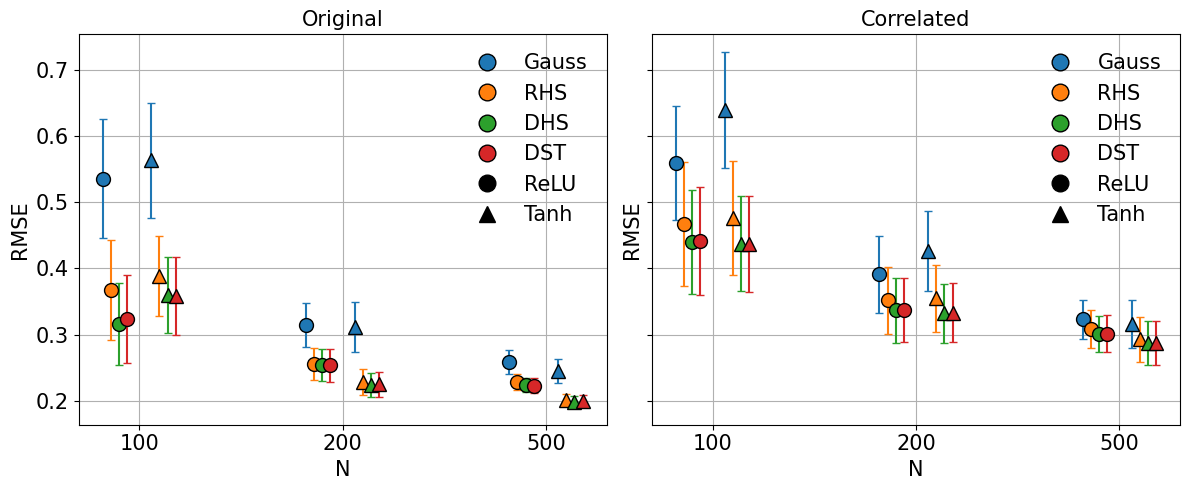

In [11]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# --- prepare data ---
df = df_all.copy()

abbr = {
    "Gaussian": "Gauss",
    "Regularized Horseshoe": "RHS",
    "Dirichlet Horseshoe": "DHS",
    "Dirichlet Student T": "DST",
}

# unify model names across activations (strip " tanh")
df["model_clean"] = df["model"].str.replace(" tanh", "", regex=False)

# summary stats per (setting, N, model, activation)
summary = (
    df.groupby(["setting", "N", "model_clean", "activation"], as_index=False)["rmse"]
      .agg(mean="mean", std="std")
)

# plotting order
settings = ["Original", "Correlated"]
Ns = [100, 200, 500]
models = ["Gaussian", "Regularized Horseshoe", "Dirichlet Horseshoe", "Dirichlet Student T"]#, "Pred CP"]

# visuals
markers = {"ReLU": "o", "Tanh": "^"}            # shapes
offsets = {"ReLU": -0.12, "Tanh": +0.12}        # side-by-side jitter on x
model_offsets = {
    "Gaussian": -0.06,
    #"Pred CP": -0.03,
    "Regularized Horseshoe": -0.02,
    "Dirichlet Horseshoe": +0.02,
    "Dirichlet Student T": +0.06,
}
palette_list = plt.get_cmap("tab10").colors
palette = {m: palette_list[i] for i, m in enumerate(models)}

# map N to base x positions and add offsets for activation
xbase = {N: i for i, N in enumerate(Ns)}

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

for ax, setting in zip(axes, settings):
    sub = summary[summary["setting"] == setting]
    # plot each model+activation with errorbars, without lines
    for m in models:
        for act in ["ReLU", "Tanh"]:
            g = sub[(sub["model_clean"] == m) & (sub["activation"] == act)]
            if g.empty:
                continue
            #xs = [xbase[n] + offsets[act] for n in g["N"]]
            xs = [xbase[n] + offsets[act] + model_offsets[m] for n in g["N"]]

            ax.errorbar(
                xs, g["mean"], yerr=g["std"],
                fmt=markers[act], markersize=10,
                linestyle="none", capsize=3,
                color=palette[m], markeredgecolor="black"
            )

    ax.set_title(f"{setting}", fontsize=15)
    ax.set_xticks(range(len(Ns)))
    ax.set_xticklabels(Ns, fontsize=15)
    ax.set_xlabel("N", fontsize=15)
    ax.set_ylabel("RMSE", fontsize=15)
    ax.tick_params(axis='y', labelsize=15)
    ax.grid()

# --- legends ---
model_handles = [
    Line2D(
        [0], [0],
        marker="o",
        linestyle="none",
        color=palette[m],
        markeredgecolor="black",
        markersize=12,
        label=abbr.get(m, m)   # <- use abbreviation
    )
    for m in models
]

# activation legend (shapes)
activation_handles = [
    Line2D([0], [0], marker=markers["ReLU"], linestyle="none", color="black",
           markersize=12, label="ReLU"),
    Line2D([0], [0], marker=markers["Tanh"], linestyle="none", color="black",
           markersize=12, label="Tanh"),
]

for ax in axes:
    ax.legend(
        handles=model_handles + activation_handles,
        title=None,
        loc="upper right",
        frameon=False,
        ncol=1,
        fontsize = 15
    )
plt.tight_layout(rect=(0, 0, 1, 1))
#plt.grid()
plt.savefig("figures_for_use_in_paper/friedman_RMSE.pdf", bbox_inches="tight")
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
# --- prepare data ---
df = df_all_pm.copy()

abbr = {
    "Gaussian": "Gauss",
    "Regularized Horseshoe": "RHS",
    "Dirichlet Horseshoe": "DHS",
    "Dirichlet Student T": "DST",
}

# unify model names across activations (strip " tanh")
df["model_clean"] = df["model"].str.replace(" tanh", "", regex=False)

# summary stats per (setting, N, model, activation)
summary = (
    df.groupby(["setting", "N", "model_clean", "activation"], as_index=False)["posterior_mean_rmse"]
      .agg(mean="mean", std="std")
)
# plotting order
settings = ["Original", "Correlated"]
Ns = [100, 200, 500]
models = ["Gaussian", "Regularized Horseshoe", "Dirichlet Horseshoe", "Dirichlet Student T", "Pred CP"]

# visuals
markers = {"ReLU": "o", "Tanh": "^"}            # shapes
offsets = {"ReLU": -0.12, "Tanh": +0.12}        # side-by-side jitter on x
model_offsets = {
    "Gaussian": -0.07,
    "Pred CP": -0.03,
    "Regularized Horseshoe": 0.00,
    "Dirichlet Horseshoe": +0.03,
    "Dirichlet Student T": +0.07,
}
palette_list = plt.get_cmap("tab10").colors
palette = {m: palette_list[i] for i, m in enumerate(models)}

# map N to base x positions and add offsets for activation
xbase = {N: i for i, N in enumerate(Ns)}

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

for ax, setting in zip(axes, settings):
    sub = summary[summary["setting"] == setting]
    # plot each model+activation with errorbars, without lines
    for m in models:
        for act in ["ReLU", "Tanh"]:
            g = sub[(sub["model_clean"] == m) & (sub["activation"] == act)]
            if g.empty:
                continue
            #xs = [xbase[n] + offsets[act] for n in g["N"]]
            xs = [xbase[n] + offsets[act] + model_offsets[m] for n in g["N"]]
            
            ax.plot(
                xs, g["mean"],
                marker=markers[act],
                markersize=7,
                linestyle="none",
                color=palette[m],
                markeredgecolor="black",
            )


    ax.set_title(f"{setting}")
    ax.set_xticks(range(len(Ns)))
    ax.set_xticklabels(Ns)
    ax.set_xlabel("N")
    ax.set_ylabel("RMSE")
    ax.grid()

# --- legends ---
model_handles = [
    Line2D(
        [0], [0],
        marker="o",
        linestyle="none",
        color=palette[m],
        markeredgecolor="black",
        markersize=7,
        label=abbr.get(m, m)   # <- use abbreviation
    )
    for m in models
]

# activation legend (shapes)
activation_handles = [
    Line2D([0], [0], marker=markers["ReLU"], linestyle="none", color="black",
           markersize=7, label="ReLU"),
    Line2D([0], [0], marker=markers["Tanh"], linestyle="none", color="black",
           markersize=7, label="Tanh"),
]

for ax in axes:
    ax.legend(
        handles=model_handles + activation_handles,
        title=None,
        loc="upper right",
        frameon=False,
        ncol=1
    )
plt.tight_layout(rect=(0, 0, 1, 1))
#plt.grid()
plt.show()

In [ ]:
sns.pointplot(data=df_rmse_relu
, x="N", y="rmse", hue="model", dodge=True, errorbar="sd")
sns.pointplot(data=df_rmse_tanh, x="N", y="rmse", hue="model", dodge=True, errorbar="sd")
plt.title("RMSE relu")
plt.show()

sns.pointplot(data=df_rmse_relu_correlated
, x="N", y="rmse", hue="model", dodge=True, errorbar="sd")
sns.pointplot(data=df_rmse_tanh_correlated, x="N", y="rmse", hue="model", dodge=True, errorbar="sd")
plt.title("RMSE relu")
plt.show()



In [ ]:
sns.pointplot(data=df_posterior_rmse_relu, x="N", y="posterior_mean_rmse", hue="model", dodge=True, errorbar="sd")
plt.title("RMSE relu")
plt.show()

sns.pointplot(data=df_posterior_rmse_tanh, x="N", y="posterior_mean_rmse", hue="model", dodge=True, errorbar="sd")
plt.title("RMSE tanh")
plt.show()


In [ ]:
sns.pointplot(data=df_posterior_rmse_relu_correlated, x="N", y="posterior_mean_rmse", hue="model", dodge=True, errorbar="sd")
plt.title("RMSE relu")
plt.show()

sns.pointplot(data=df_posterior_rmse_tanh_correlated, x="N", y="posterior_mean_rmse", hue="model", dodge=True, errorbar="sd")
plt.title("RMSE tanh")
plt.show()
